In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor

import os
import glob

import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

title_font = {'fontname':'Arial', 'size':'22', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'fontname':'Arial', 'size':'18'}


path = "C:\\Users\\eamirian\\Desktop\\SC"
allFiles = glob.glob(os.path.join(path,"*.csv"))


np_array_list = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
#df = df[~(df == 0).any(axis=1)]
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
big_frame = pd.DataFrame(comb_np_array)
big = np.array(big_frame)



X=big[1:950,2:6]
y=big[1:950,11]


# splitting the samples randomely: 85% training, 15% testing
tr_input_var, test_input_var, tr_output_var, test_output_var = train_test_split(X, y, train_size=0.80)
#rf = RandomForestRegressor(n_estimators=5)


mynet = MLPRegressor(hidden_layer_sizes=(20,20,20),  activation='identity', solver='adam',    alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)
mynet.fit(tr_input_var, tr_output_var)


training_scatter_y= mynet.predict(tr_input_var)



testing_scatter_y = mynet.predict(test_input_var)




training_scatter_y= mynet.predict(X)



C:\Users\eamirian\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


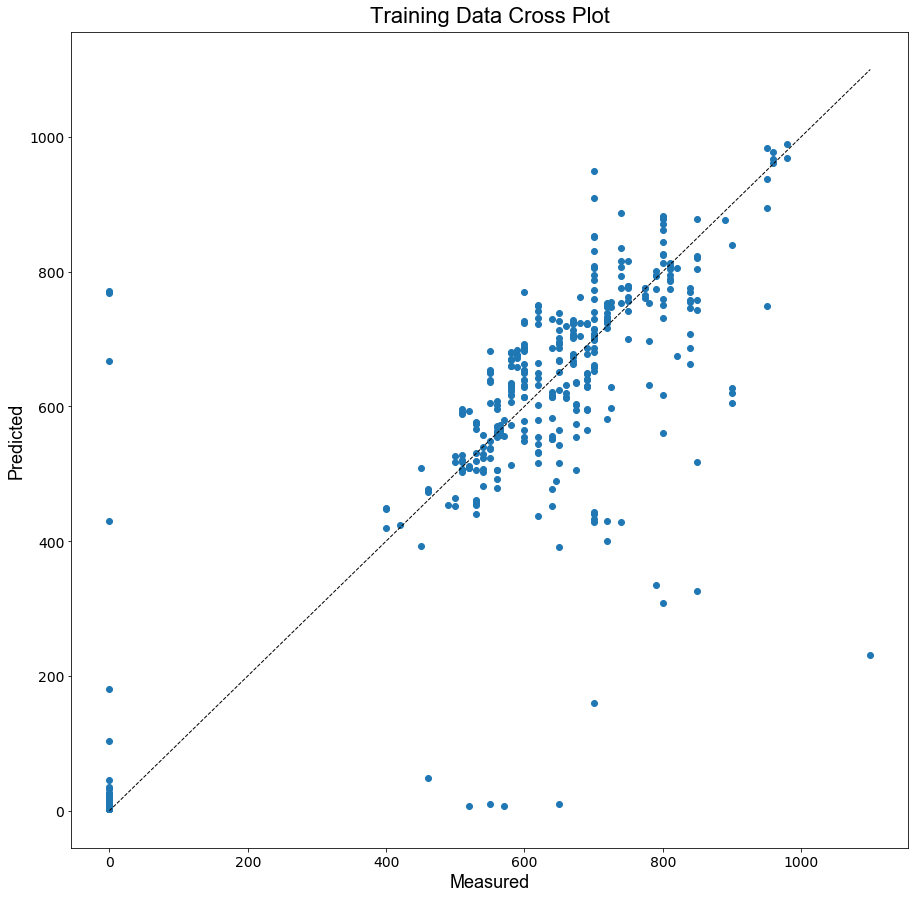

In [2]:
training_scatter_y= mynet.predict(tr_input_var)

plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots()
ax.scatter(tr_output_var, training_scatter_y)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured', **axis_font)
ax.set_ylabel('Predicted', **axis_font)
ax.set_title('Training Data Cross Plot', **title_font)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

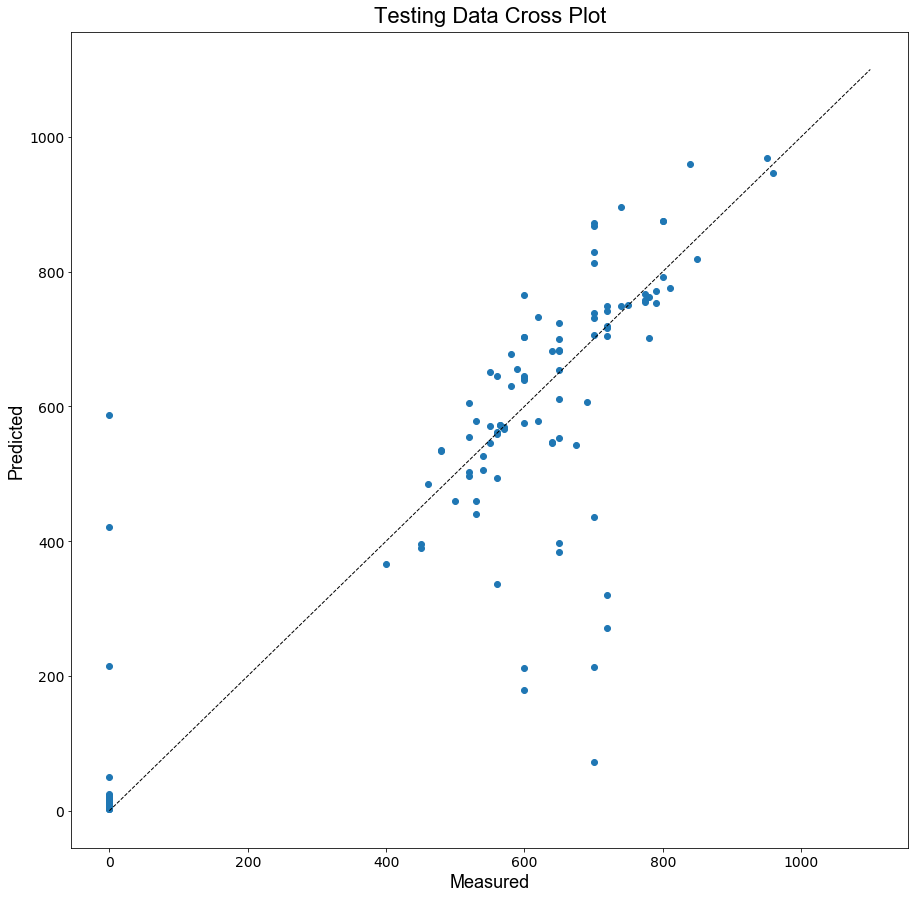

In [3]:
plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots()
ax.scatter(test_output_var, testing_scatter_y)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured', **axis_font)
ax.set_ylabel('Predicted', **axis_font)
ax.set_title('Testing Data Cross Plot', **title_font)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
